*Created by*: 
**Lok Hin Wu** 
**44572492**
# ACST890 S119 THQ2
## Question 2
### Part A

In [ ]:
import pandas as pd
import numpy as np

In [1]:
data = {'Output, Q':[80,150,135,165,95,130,110],
       'Labour, L':[60,100,100,120,70,90,80],
       'Capital, K':[50,100,80,100,60,80,70]}
df = pd.DataFrame(data, index = ['B','C','D','E','F','G','H'])

In [2]:
print(df)

   Output, Q  Labour, L  Capital, K
B         80         60          50
C        150        100         100
D        135        100          80
E        165        120         100
F         95         70          60
G        130         90          80
H        110         80          70


In [3]:
# Print mean of each variable
df.mean()

Output, Q     123.571429
Labour, L      88.571429
Capital, K     77.142857
dtype: float64

In [4]:
# Print variance of each variable
df.var()

Output, Q     914.285714
Labour, L     414.285714
Capital, K    357.142857
dtype: float64

In [5]:
# Print standard deviation of each variable
df.std()

Output, Q     30.237158
Labour, L     20.354010
Capital, K    18.898224
dtype: float64

In [6]:
# Print median of each variable
df.median()

Output, Q     130.0
Labour, L      90.0
Capital, K     80.0
dtype: float64

---

### Part B

In [7]:
import seaborn as sns

In [8]:
x1 = df['Output, Q']
x2 = df['Labour, L']

Text(0, 0.5, 'density')

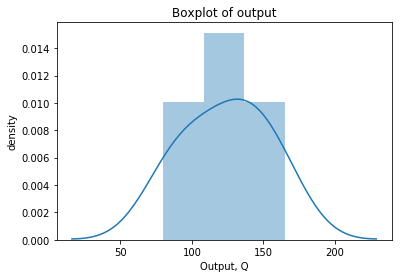

In [9]:
ax1 = sns.distplot(x1)
ax1.set_title('Boxplot of output')
ax1.set_ylabel('density')

Text(0, 0.5, 'density')

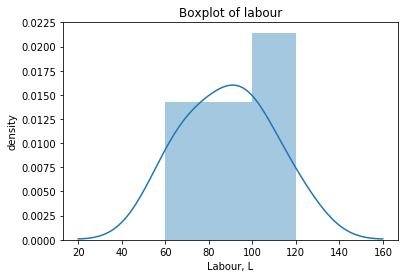

In [10]:
ax2 = sns.distplot(x2)
ax2.set_title('Boxplot of labour')
ax2.set_ylabel('density')

---

### Part C

In [11]:
log_df = np.log(df)

In [12]:
print(log_df)

   Output, Q  Labour, L  Capital, K
B   4.382027   4.094345    3.912023
C   5.010635   4.605170    4.605170
D   4.905275   4.605170    4.382027
E   5.105945   4.787492    4.605170
F   4.553877   4.248495    4.094345
G   4.867534   4.499810    4.382027
H   4.700480   4.382027    4.248495


---

### Part D

In [13]:
x = log_df[['Labour, L','Capital, K']]
y = log_df['Output, Q']

In [14]:
import statsmodels.api as sm

In [15]:
xx = sm.add_constant(x)
mdl1 = sm.OLS(y, xx).fit()

C:\Users\HUGO\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [16]:
print(mdl1.params)

const         0.146233
Labour, L     0.548427
Capital, K    0.508741
dtype: float64


In [17]:
alpha = mdl1.params[1]
beta = mdl1.params[2]

In [18]:
print('\u03b1+\u03b2 =', alpha+beta)

α+β = 1.0571684057723623


From above it can be seen
that the sum of values alpha and beta is equal to 1.0572, which is not 1. Hence the model may not be homogenoeous of degree 1

---

### Part E

In [19]:
import matplotlib.pyplot as plt
residual = y-mdl1.predict(xx)
index = ['B','C','D','E','F','G','H']

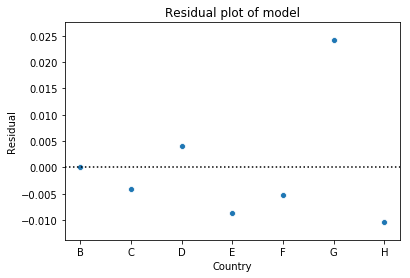

In [22]:
ax = sns.scatterplot(x=index, y=residual)
ax.set_title('Residual plot of model')
ax.set_ylabel('Residual')
ax.set_xlabel('Country')
plt.axhline(0, color='black', ls='dotted')

---

### Part F

In [21]:
print('Adjusted R\u00b2 for the model is:', mdl1.rsquared_adj)

Adjusted R² for the model is: 0.9968763418198051
